In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.preprocessing import image
from PIL import Image
from sklearn.linear_model import LogisticRegression

Using TensorFlow backend.
C:\Users\anand\.conda\envs\ml_env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
train_path = "fruits-360/Training"
train_labels = os.listdir(train_path)

In [5]:
image_size = (28, 28)
actualimg_h, newimg_h = 28, 28
colorscale = 'rgb'  # grayscale
colorval = 3

In [6]:
X = []
Y = []

In [7]:
for i, label in enumerate(train_labels):
    cur_path = train_path + "/" + label
    count = 1
    for image_path in glob.glob(cur_path + "/*.jpg"):
        img = image.load_img(
            image_path, target_size=image_size, color_mode=colorscale)
        img = image.img_to_array(img)
        img = img.flatten()
        X.append(img)
        Y.append(label)
        count += 1

In [8]:
X = np.asarray(X)
Y = np.asarray(Y)

In [9]:
print('Data shape: ', X.shape)
print('Data label shape: ', Y.shape)


Data shape:  (46371, 2352)
Data label shape:  (46371,)


In [10]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, random_state=0)


In [11]:
print('Data shape: ', X_Train.shape)
print('Data label shape: ', Y_Train.shape)

Data shape:  (34778, 2352)
Data label shape:  (34778,)


In [13]:
model = LogisticRegression()
model.fit(X_Train, Y_Train)


C:\Users\anand\.conda\envs\ml_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anand\.conda\envs\ml_env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
Y_Pred = model.predict(X_Test)


In [15]:
acc_score = accuracy_score(Y_Test, Y_Pred)
print('accuracy score: ', acc_score)
confusion_matrix(Y_Test, Y_Pred)
print('Training Score: {0}'.format(model.score(X_Train, Y_Train)))
print('Testing Score: {0}'.format(model.score(X_Test, Y_Test)))


accuracy score:  0.999396187354438
Training Score: 1.0
Testing Score: 0.999396187354438


In [16]:
test_images = X_Test.reshape(-1, newimg_h, newimg_h, colorval)


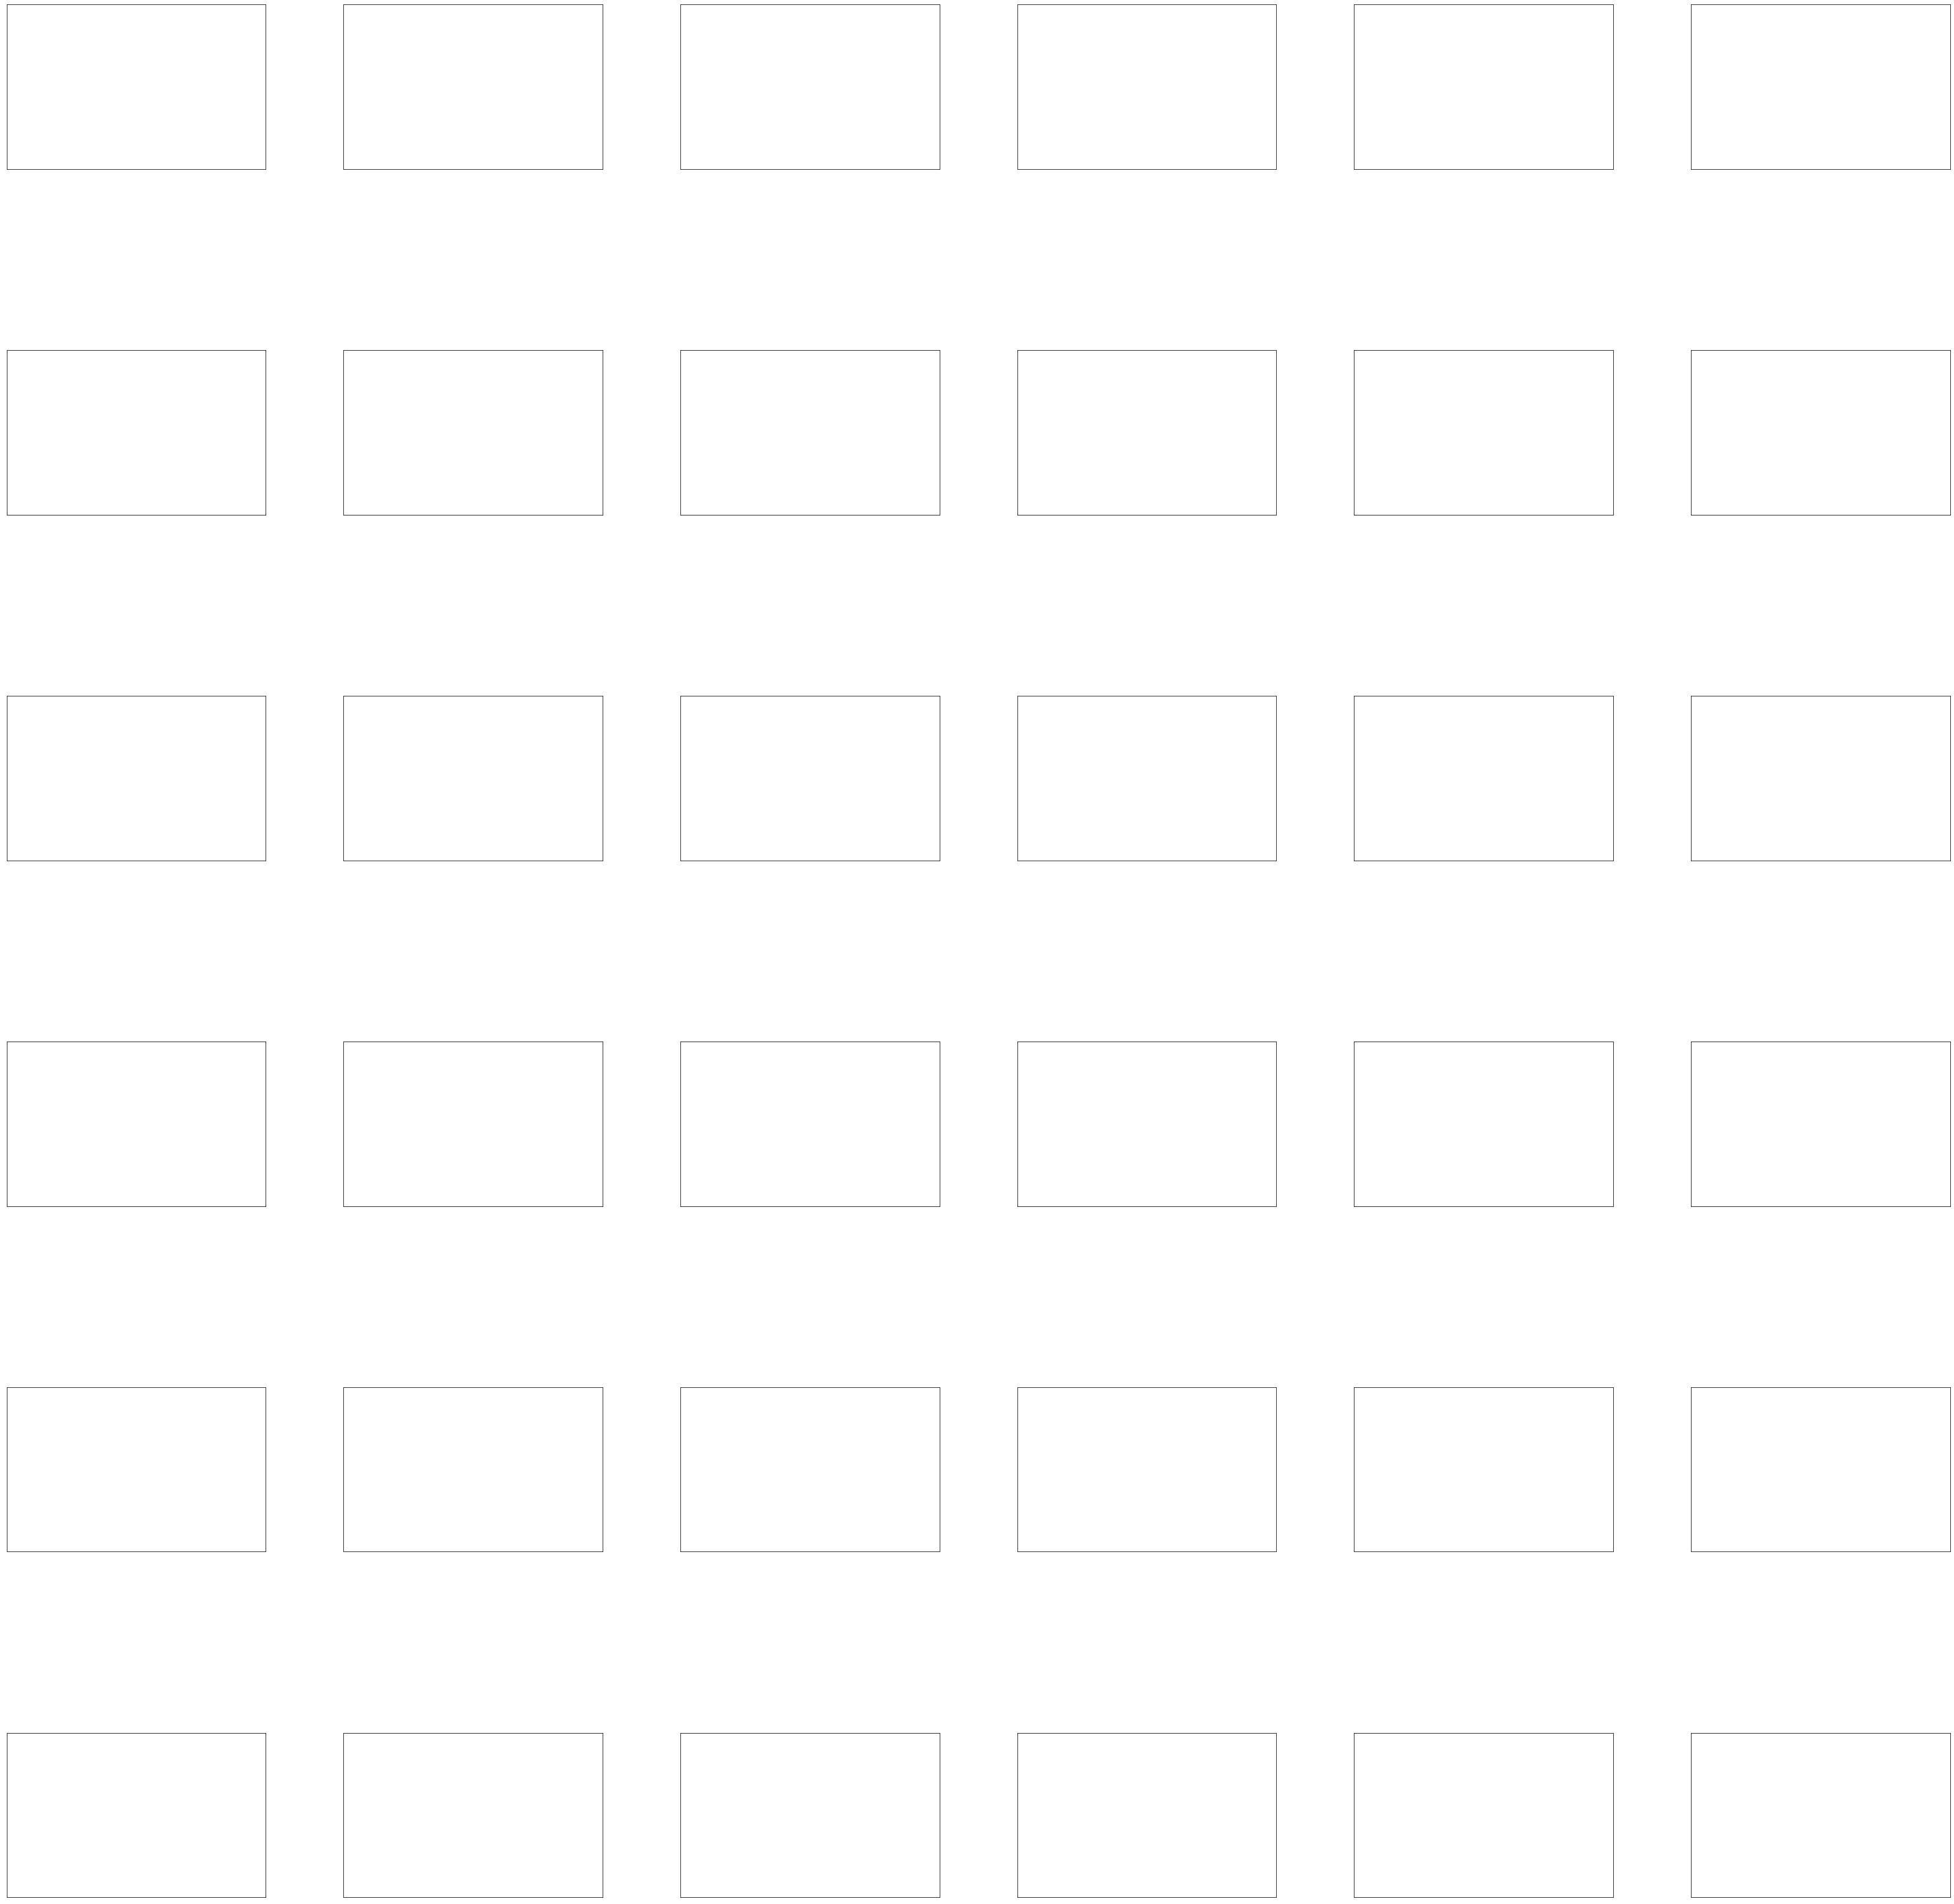

In [17]:
fig, axes = plt.subplots(6, 6, figsize=(56, 56), subplot_kw={
                         'xticks': [], 'yticks': []}, gridspec_kw=dict(hspace=1.1, wspace=0.3))


In [18]:
for i, ax in enumerate(axes.flat):
    img = Image.fromarray(test_images[i].astype('uint8'))
    img_as_img = img.convert("RGB")


In [19]:
ax.imshow(img_as_img, cmap='binary', interpolation='nearest')
ax.text(-.1, -0.31, str(Y_Test[i]), transform=ax.transAxes, color='black')
ax.text(-.1, -0.6, str(Y_Pred[i]), transform=ax.transAxes,
            color='green' if (Y_Pred[i] == Y_Test[i]) else 'red')


Text(-0.1, -0.6, 'Tomato 3')

In [20]:
plt.show()